In [1]:
file='training.1600000.processed.noemoticon.csv'

In [1]:
import pandas as pd
import datetime
from langdetect import detect
from datetime import datetime


import numpy as np
import random

import re
from tensorflow.keras import models
from tensorflow.keras import layers

import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stopw=stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer



# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

stemmer=SnowballStemmer("english")

In [117]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [3]:
columns = ['sentiment','id','date','query_string','user','text']

In [4]:
DATASET_ENCODING = "ISO-8859-1"
df=pd.read_csv(file,names=columns,encoding=DATASET_ENCODING)

In [5]:
df=df.drop(['date', 'user','id','query_string'], axis=1) 

In [6]:
def languagedetector(text):
    
    try:
        language = detect(text)
        #print(language)
    except:
        language = "Error"
    return language

In [7]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
start = datetime.now().isoformat()
df['result']=df['text'].apply(lambda x:languagedetector(x))
end = datetime.now().isoformat()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [208]:
df=pd.read_csv('datawithlang.csv')

In [209]:
df=df.drop(df[df['result']!='en'].index)

In [152]:
#df.loc[df['result'] != 'en']



text, sentiment = list(df['text']), list(df['sentiment'])

In [215]:

def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,'',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,'', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            if word not in stopwordlist:
                if len(word)>1:
                # Lemmatizing the word.
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word+' ')
           
        processedText.append(tweetwords)
        return processedText



In [211]:
data=df[1:1000]

In [ ]:
# for v in data['clean_text']:
#     print(str(v).split('\'')[1])
#     break;

In [216]:
df['clean_text']=df['text'].apply(lambda x:preprocess([x]))
df['clean_text']=df['clean_text'].apply(lambda x:str(x).split('\'')[1])

In [ ]:
df.to_csv('data/Preprocesswithstopword.csv',index=False)

In [ ]:
df.to_csv('data/Preprocesswithoutstopword.csv',index=False)

In [226]:
dfpos=df[df['sentiment']==4]

In [236]:
dfpos.to_csv('positivedatawithoutstopword.csv',index=False)

In [229]:
dfneg=df[df['sentiment']==0]

In [237]:
dfneg.to_csv('negativedatawithoutstopword.csv',index=False)

In [ ]:
df['sentiment'] = df['sentiment'].replace(4,1)

In [241]:
text, sentiment = list(df['clean_text']), list(df['sentiment'])

In [238]:
##############################################################################

,sentiment,text,result,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww bummer shoulda got david carr third day EM...
1,0,is upset that he can't update his Facebook by ...,en,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,en,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,en,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",en,no not behaving mad see over
5,0,@Kwesidei not the whole crew,en,not whole crew
6,0,Need a hug,en,need hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,en,hey long time no see yes rain bit bit lol fine...
8,0,@Tatiana_K nope they didn't have it,en,nope didn
10,0,spring break in plain city... it's snowing,en,spring break plain city snowing


CLEANED RESULT

In [7]:
df=pd.read_csv('data/Preprocesswithstopword.csv',encoding='utf-8')

In [12]:
text,sentiment=list(df['clean_text'].values.astype('U')),list(df['sentiment'])

In [8]:
df['sentiment'] = df['sentiment'].replace(4,1)

,sentiment,text,result,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww bummer shoulda got david carr third day EM...
1,0,is upset that he can't update his Facebook by ...,en,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,en,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,en,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",en,no not behaving mad see over


In [12]:
del df['text']

In [13]:
del df['result']

In [15]:
df.shape

(1486988, 2)

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

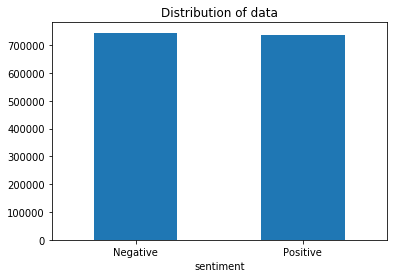

In [14]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [16]:
df1=pd.read_csv('data/positivedatawithoutstopword.csv',encoding='utf-8')

In [17]:
df1.head()

,sentiment,text,result,clean_text
0,4,I LOVE @Health4UandPets u guys r the best!!,en,love guy best
1,4,im meeting up with one of my besties tonight! ...,en,im meeting one besties tonight cant wait girl ...
2,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",en,thanks twitter add sunisa got meet hin show dc...
3,4,Being sick can be really cheap when it hurts t...,en,sick really cheap hurt much eat real food plus...
4,4,@LovesBrooklyn2 he has that effect on everyone,en,effect everyone


In [21]:
df1['sentiment'] = df1['sentiment'].replace(4,1)

In [20]:
del df1['text']
del df1['result']


In [22]:
df1.head()

,sentiment,clean_text
0,1,love guy best
1,1,im meeting one besties tonight cant wait girl ...
2,1,thanks twitter add sunisa got meet hin show dc...
3,1,sick really cheap hurt much eat real food plus...
4,1,effect everyone


In [25]:
text,sentiment=list(df1['clean_text'].values.astype('U')),list(df1['sentiment'])

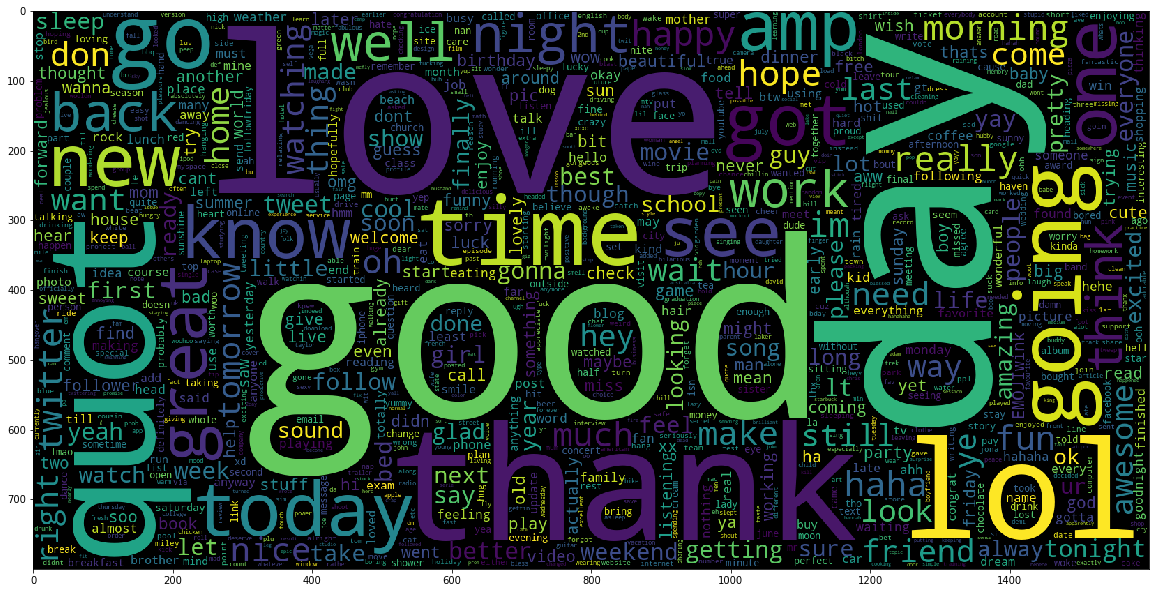

In [26]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(text))
plt.imshow(wc)

In [28]:
df2=pd.read_csv('data/negativedatawithoutstopword.csv',encoding='utf-8')

In [29]:
df2['sentiment'] = df2['sentiment'].replace(4,1)

In [30]:
text,sentiment=list(df2['clean_text'].values.astype('U')),list(df2['sentiment'])

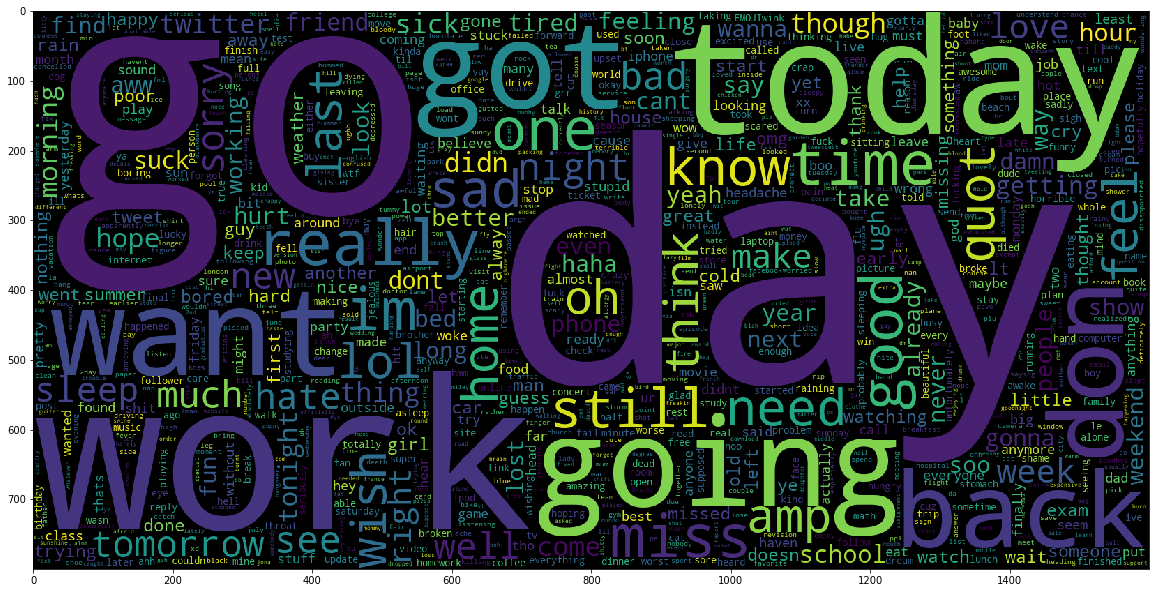

In [31]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(text))
plt.imshow(wc)

In [32]:
data=pd.read_csv('data/Preprocesswithstopword.csv',encoding='utf-8')

In [33]:
data.head()

,sentiment,text,result,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww bummer shoulda got david carr third day EM...
1,0,is upset that he can't update his Facebook by ...,en,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,en,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,en,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",en,no not behaving mad see over


In [34]:
del data['text']
del data['result']

In [35]:
data['sentiment'] = data['sentiment'].replace(4,1)

In [36]:
dfpos=data[data['sentiment']==1]
dfneg=data[data['sentiment']==0]

In [37]:
dfpos.head()

,sentiment,clean_text
746567,1,love guy best
746568,1,im meeting one besties tonight cant wait girl ...
746569,1,thanks twitter add sunisa got meet hin show dc...
746570,1,sick really cheap hurt much eat real food plus...
746571,1,effect everyone


In [38]:
text,sentiment=list(dfpos['clean_text'].values.astype('U')),list(dfpos['sentiment'])

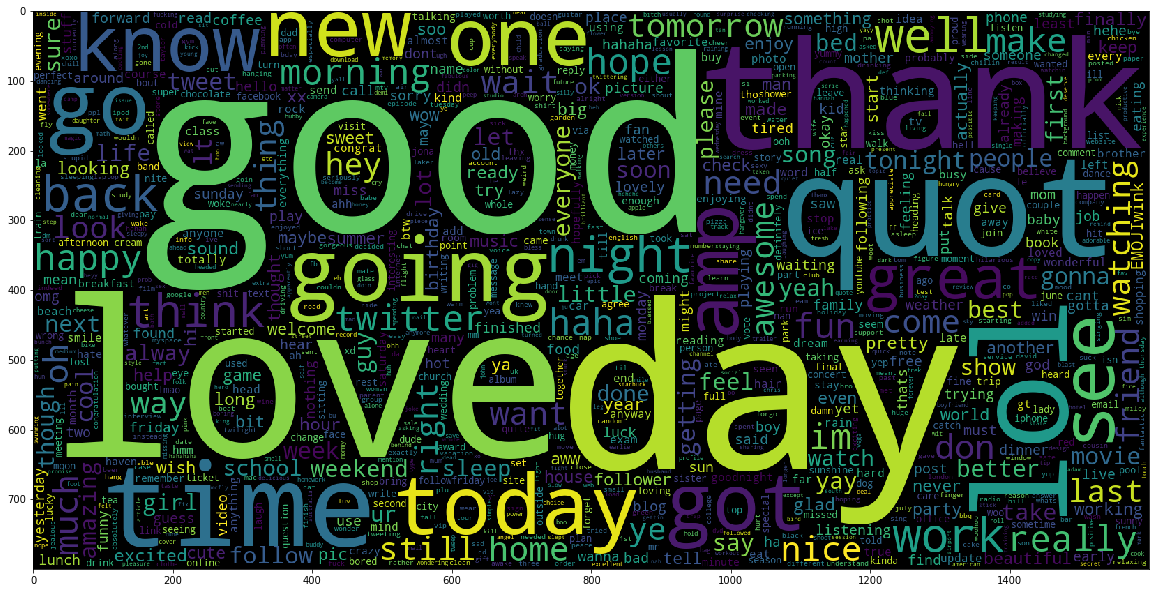

In [39]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(text))
plt.imshow(wc)

In [40]:
text,sentiment=list(dfneg['clean_text'].values.astype('U')),list(dfneg['sentiment'])

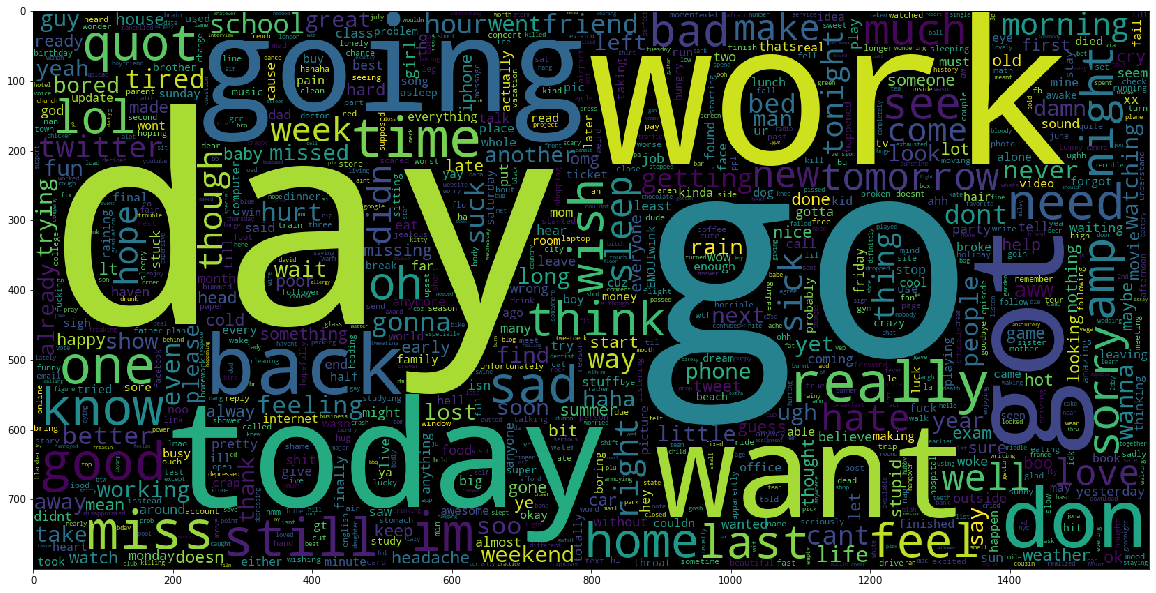

In [41]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(text))
plt.imshow(wc)